This NoteBook focus on learning under the hood when training a model.
This is going to use simple linear regression , and later Polynomial Regression.

This will expain how to avoid overfitting while training a model using different regulariation techniques.

## Linear Regression
$f(\mathbf{x})=θ_0 +θ_1 \times {\mathbf{x}}$

Linear regression model prediction

$\hat y = θ_0 + \theta_1 \mathbf {x_1}+\theta_2 \mathbf {x_2}+\cdots+\theta_n \mathbf {x_n}$

* $\hat y$ = predicted value
* n = number of features.
* $\mathbf{x_i}$ is the $i^{th}$ feature value.
* $θ_j$ is the $j^{th}$ model parameter (including the bias term $θ_0$ and the feature weights $θ_1,θ_2,\cdots,θ_n$).

Linear Regression model prediction (vectorized form)

* $\hat y= h_{\theta} \mathbf{x}= θ^T \cdot \mathbf {x}$

* $θ$ is the model's parameter vector , containing the bias term $\theta_0$ and feature weights $\theta_1 to \ \theta_n$

* $\theta^T$ is transpose of $\theta$ (row vector instead of column vector)

* $\mathbf{x}$ is the instance's feature vector, containing $x_0 to x_n$, with $x_0$ always equal to 1

* $θ^T \cdot \mathbf{x}$ is the dot product of $θ^T$ and $\mathbf x$

* $h_{θ}$ is the hypothesis function, using the model parameters $θ$

* Most common performance measure of a regression model is the Root Mean Square Error (RMSE).

* Minimize the RMSE by finding value of $θ$

In practice it is similar to minimize the MSE (Mean square Error) then the RMSE, and it leads to the same result.

The MSE of a Linear Regression hypothesis $h_{θ}$ on a training set $\mathbf X$ is calculated using.

### MSE cost function for a Linear Regression model

$MSE(\mathbf{X}, h_{θ})=\dfrac{1}{m_{i}} \sum_{i=1}^m (\theta^T \cdot \mathbf{x^{(i)}}-\mathbf{y^{(i)}})^2$

## The Normal Equation
Find $θ$ using *closed-form solution*

$\hatθ= (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X^T} \cdot y$

* $\hatθ$ is the value of $\theta$ that minimizes the cost function.

* **y** is the vector of target values containing $y^{(1)}\ to \ y^{n}$

In Below Example we will use below equation.
$y=4+3x_0 +Gaussian \ noise$

In [210]:
import numpy as np

np.random.seed(42) # to make this code example reproducible
m=100 #number of instances
X= 2 * np.random.rand(100,1) #np.random.rand(100, 1) creates an array of 100 random numbers between 0 and 1, with a shape of (100, 1)
y= 4+3*X+np.random.randn(100,1)


Now let's compute $\hat\theta$ using normal equation.

In [211]:
from sklearn.preprocessing import add_dummy_feature

X_b= add_dummy_feature(X) # add x_b[0]=1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b)@X_b.T @y

theta_best # and the equation was 4 + 3*X+ Gaussian noise, so expected theta_0 is 4 and theta_1 is 3
#but we get theta_0= 4.215, theta_1= 2.770, close enough, but due to noise the actual 4 and 3 didn't come.


array([[4.21509616],
       [2.77011339]])

In [212]:
X_new=np.array([[0],[2]])
X_new_b= add_dummy_feature(X_new) #add x0=1 to each instance
y_predict= X_new_b @ theta_best

y_predict

array([[4.21509616],
       [9.75532293]])

Let's plot the model's predictions

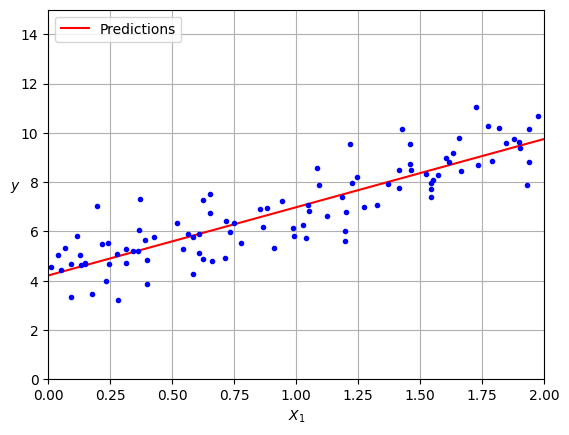

In [213]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict,"r-",label="Predictions")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.grid()
plt.xlabel("$X_1$")
plt.ylabel("$y$",rotation=0)
plt.legend(loc="upper left")
plt.show()

Performing Linear regression using Scikit-Learn

In [214]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[4.21509616] [[2.77011339]]


array([[4.21509616],
       [9.75532293]])

In [215]:
theta_bast_svd, residuals, rank,s= np.linalg.lstsq(X_b, y, rcond=1e-6)
print("theta_bast_svd (biased, slope): ",theta_bast_svd, "residuals :",residuals,"rank :", rank,"s :",s)

theta_bast_svd (biased, slope):  [[4.21509616]
 [2.77011339]] residuals : [80.6584564] rank : 2 s : [14.37020392  4.11961067]


This function computes $\hat \theta = \mathbf{X}^+\mathbf y$ ,where $\mathbf{X}^+$ is the pseudoinverse of $\mathbf X$(specifically, the Moore-Penrose inverse).pseudoinverse itself is computed using a standard matrix factorization technique called singular value decomposition, that can decompose the training set matrix $\mathbf X$ into the matrix multiplication of three matrices $\mathbf{U ∑ V^T}$. The pseudoinverse computed as $X^+=V∑^+U^T$. To compute the matrix $\sum^+$, the algorithm takes $\sum $ and sets to zero all values smaller than a tiny threshold value, then it replaces all the nonzero values with their inverse , and finally it transpose the resulting matrix.

NOTE: **Normal equation ** will not work if the matrix $\mathbf{X^TX}$ is not invertable(i.e, Singular).


In [216]:
np.linalg.pinv(X_b) @y # this is same as theta_best or theta_bast_svd

array([[4.21509616],
       [2.77011339]])

## Gredient Descent

It is a generic optimization algorithm capable of finding optimal solutions to a wide range of problem. The general idea of Gredient Descent is to tweak parameters iteratively in order to minimize a cost function.

* It measures the local gredient of the error function with regards to the parameter vector $θ$ and it goes in the direction of descending gradient. Once a grediant is 0 , it has reached the minimum!

* we start by filling $θ$ with random value (this is called random initialization), and then improve it gradually, taking a very small step at a time, each step attempting to decrease the cost function (e.g. MSE), untill the algorithm converges to a minimum.

* step size is very important, determined by the learning rate hyperparameter.

* too small learning rate will have to go through many iterations to converge, which will take a long time.

* too high value will jump and possibly it will miss the optimal minimum value.

* not all cost functions are nice regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum very difficult.Two main challange: if the random initialiation starts the algoritm on the left, then it will converge to a local minimum, which is not good as the global minimum.

* MSE cost function for Linear Regression model happens to be a convex function, which means if we pick two points on the curve the line segment joining them never crosses the curve.This implies that there are no local minimum, just one global minimum.It is also a continuous function with a slope that never changes abruptly.

* Cost function has the shape of a bowl, but it can be an elongated bowl if the features have very **different scales**.

## Batch Gradient Descent

* To implement Gradient Descent , need to compute the gradient of the cost function with regards to each model parameter $\theta_j$.

* $\mathbf \theta \$ is representing all parameters of a model in a vector form.

* Need to calculate how much the cost function will change if changing $θ_j$ just little. This is called a *partial derivative*.
* below equation computes the partial derivative of the cost function with regards to parameter (one single parameter) $\theta _j$, noted $\partial MSE(\theta ) / \partial \theta_j$

$\dfrac{\partial}{\partial \theta _j}MSE(\theta)= \dfrac{2}{m}\sum_{i=1}^m(\theta^T \cdot \mathbf{x}^{(i)} - y^{(i)})x_j^{(i)}$


* Instead of computing these gradient individually , can use The **gradient vector**, noted $\nabla_{\theta}MSE(\theta)=\begin{pmatrix}
\dfrac{\partial}{\partial\theta_0}MSE(\theta)\\
\dfrac{\partial}{\partial\theta_1}MSE(\theta)\\
\vdots \\
\dfrac{\partial}{\partial\theta_n}MSE(\theta)
 \end{pmatrix}= \dfrac{2}{m}\mathbf X^T  (\mathbf X \cdot \theta - \mathbf{y})$


 * ${\mathbf X}$ is full training data set,and applicable for each gradient descent step! This is why it is called batch gradient descent.

 * Gredient Descent is slow for large training dataset, however it scales well with number of features.

 * Training a linear regression model when there are 100s or 1000s features is much faster using gradient descent then using normal equation or SVD (Singular value decomposition).

 * once we get gradient vector , which points uphill , just go opposite direction to go downhill (reduce cost). This means subtracting $∇_{θ}MSE(\theta)$ from $theta$. This is where the learning rate $η$ comes into play: multiply the gredient descent vector  by $\eta$ to determine the size of the downhill step.

 * **Gradient descent step**
 $\theta ^{(next step)}= \theta - \eta \nabla_{\theta}MSE(\theta)$




In [217]:
eta=0.1 # learning rate
n_epochs=1000
m=len(X_b) #number of instances

np.random.seed(42)
theta=np.random.randn(2,1) #randomly initialized model parameters
print(theta)
print(X_b.shape)
for epoch in range(n_epochs):
  gradients=2/m * X_b.T @ (X_b @ theta -y)
  theta=theta-eta * gradients

[[ 0.49671415]
 [-0.1382643 ]]
(100, 2)


Eah iteration over the training set is  called an *epoch*. Resulting `theta`

In [218]:
theta

array([[4.21509616],
       [2.77011339]])

Check gradient for three different learning rates $\mathbf η$ for first 20 epochs

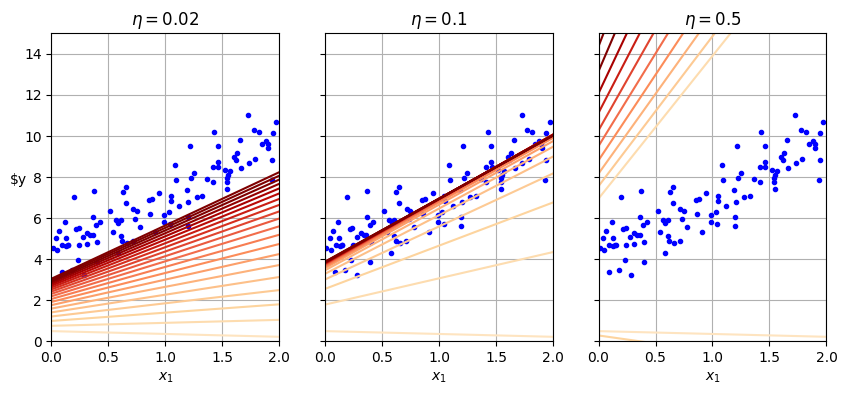

In [219]:
import matplotlib as mpl

def plot_gredient_descent(theta, eta):
  m=len(X_b)
  plt.plot(X,y,"b.")
  n_epochs=1000
  n_shown=20
  theta_path=[]
  for epoch in range(n_epochs):
    if epoch < n_shown:
      y_predict=X_new_b @ theta
      color=mpl.colors.rgb2hex(plt.cm.OrRd(epoch/n_shown + 0.15))
      plt.plot(X_new, y_predict, linestyle="solid", color=color)
    gradients= 2/m * X_b.T @ (X_b @ theta - y)
    theta=theta - eta * gradients
    theta_path.append(theta)

  plt.xlabel("$x_1$")
  plt.axis([0,2,0,15])
  plt.grid()
  plt.title(fr"$\eta = {eta}$")
  return theta_path

np.random.seed(42)
theta= np.random.randn(2,1) # random initialized

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gredient_descent(theta, eta=0.02)
plt.ylabel("$y",rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gredient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gredient_descent(theta, eta=0.5)
plt.show()





when $\eta =0.02$ , the learning rate is too slow ,the algorithm will eventually reach the solution, but it will take a long time. In the middle , the learning rate looks pretty good: in just few epoch, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

NOTE: To find a good learning rate, can use **Grid Search**, however we may need to limit the number of epochs so that grid search can eliminate models that take too long to converge.

**How to set number of epochs**?
- Set the epocs too high but interrupt the algorithm when the gradient vector become tiny(when its norm becomes smaller than a tim=ny number $ϵ$(tolerance)- because this happens when gredient descent has (almost) reached the minimum.).

### Convergence Rate
* The cost function is convex and its slope doesnot change abruptly (as is the case for the MSE cost function).

* batch gradient descent with a fixed learning rate will evantually converge to the optimal solution.But it may take time.

## Stochastic(Random) Gradient Descent

Why Stochastic Gradient Descent?
- The main problem with batch gradient descent is it uses whole training data set in every step, which makes it very slow when training a large dataset.

- Stochastic Gradient descent picks a random instance in the training set at every step and computes the gradients based only on that single instance.Working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration.

- Stochastic gradient descent can be implemented as an out-of-core algoritm as to train huge datasets that cannot fit in one machine’s main memory (this is called out-of-core learning).

- As this is Random, it is much less regular than batch gradient descent: the cost function will jump u and down, decreasing only on average.Over time it will end up very close to the minimum, but once it get there it will continue to bounce around, never setting dowm.This gives final parameter a good value but not optimal.

- When cost function is very irregular , this can help the algorithm jump out of local minima, so Stochastic GD has better chance to finding the global minimum then batch gradient descent does.

- Randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minium.

### How to handle this situation to get optimal value?
- Gradually reduce the learning rate.
  - The steps start out large (that helps to skip local minimum), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to *simulated annealing*, an algorithm to settle at the global minimum.
  - The function that determines the learning rate at each iteration is called the *learning schedule*.
  -If learning rate is reduced too quickly, that might get stuck in a local minimum, or end up frozen halfway to the minimum.
  - If learning rate is is reduced too slowly , that may jump around the minimum for a long time and end up with the suboptimal solution, if halt training too early.

  - **Suffling** the instance from given dataset is very important when using Stochastic gradient descent method or it will start by optimizing for the one label, then the next and so on, and it will not settle close to the global minimum.


Below code implements stochastic gradient descent using simple learning schedule.

In [220]:
m

100

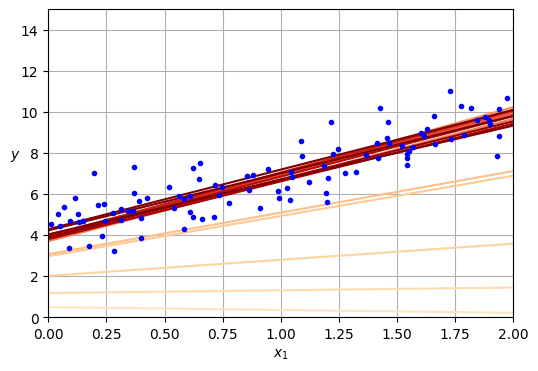

In [221]:
n_epochs=50

t0, t1= 5, 50 #learning schedule hyperparameters
theta_path_sgd=[]
def learning_schedule(t):
  return t0/(t+t1)

np.random.seed(42)

theta= np.random.randn(2,1) #random initialization
n_shown=20
plt.figure(figsize=(6,4))

for epoch in range(n_epochs):
  for iteration in range(m):

    if epoch==0 and iteration< n_shown:
      y_predict=X_new_b @ theta
      color=mpl.colors.rgb2hex(plt.cm.OrRd(iteration/n_shown+0.15))
      plt.plot(X_new,y_predict, color=color)
    random_index=np.random.randint(m)
    xi= X_b[random_index: random_index+1]
    yi=y[random_index: random_index+1]
    gradients= 2 * xi.T @(xi @ theta -yi) #for SGD do not divide by m as using one single instance and not all X,y
    eta= learning_schedule(epoch * m+ iteration)
    theta = theta - eta * gradients # error, that needs to minimize to get optimal theta value.
    theta_path_sgd.append(theta)

plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.show()

In above code , it iterate by round of m iterations; each round is called epoch. While the batch gradient descent code iterated 1000 times through the whole dataset, this code goes through the training set only 50 times and reaches a pretty good solution.

In [222]:
theta

array([[4.21076011],
       [2.74856079]])

Since the instances picked randomly, some instances may be icked several times per epoch, while others may not be picked at all. to be sure that the algorithm goes through every instance at each epoch, another aroach is to shuffle the training set (shuffle the input features and labels jointly), then go through it instance by instance, then shuffle it again, and so on. However this approach is more complex and it generally does not improve the results.

Perform Linear Regression using Stochasic GD with Scikit-Learn, can use the `SGDRegressor` class, which defaults to optimizing the MSE cost function.

In [223]:
from sklearn.linear_model import SGDRegressor

#max_iter is total epochs or untill the loss drops by less than 10^-5(tol) during 100 epochs (n_iter_no_change).
#it starts with learning rate eta0=0.01, using the default learning schedule(different then the one we have used in above algorithm)
#It does not use any regularization (penalty=None)
sgd_reg=SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,n_iter_no_change=100, random_state=42)

sgd_reg.fit(X,y.ravel()) #y.ravel, because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [224]:
#It is giving theta (which is intercept or bias , coefficient or slope)
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Mini-Batch Gradient Descent

Batch Gradient Descent: it trains based on all training data in each steps that slow down the training process but it converse nicely to get hyperparameter $\theta $ value.

Stochastic Gradient Descent: It randomly select instance of given data and helps to get the hyperparameters $\theta $ value, this is  fast but it may end up with good $\theta $ value then optimal $\theta $.

Mini-Batch Gradient Descent computes the gradients on small random sets of instances called mini-batchs.

### Advantage
- Can get performance boost from hardware optimization of matrix operations, especially when using GPU as compare with Stochastic Gradient Descent.
- the algorithm progress in parameter space is less erratic then with stochastic GD, especially with fairly large mini-batches , as a result , mini-batch GD will end up walking around a bit closer to the **minimum** than stochastic GD.

## Disadvantage
 - It may be harder for Mini-Batch GD to escape from local minimum.

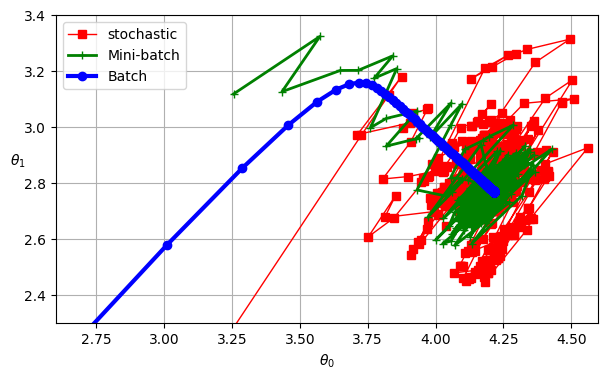

In [225]:
from math import ceil

n_epochs= 50
minibatch_size = 20
n_batches_per_epoch= ceil(m /minibatch_size)

np.random.seed(42)
theta=np.random.randn(2,1) #random initialiation

t0,t1=200, 1000 # learning schedule hyperparameters.

def learning_schedule(t):
  return t0/(t1+t)

theta_path_mgd=[]

for epoch in range(n_epochs):
  shuffled_indices= np.random.permutation(m) # to suffle the instances of data
  X_b_shuffled=X_b[shuffled_indices]
  y_shuffled= y[shuffled_indices]
  for iteration in range(0, n_batches_per_epoch):
    idx=iteration * minibatch_size
    xi=X_b_shuffled[idx:idx+minibatch_size]
    yi=y_shuffled[idx:idx+minibatch_size]
    gradients= 2/ minibatch_size * xi.T @ (xi @ theta - yi) # as using mini-batch , equation is 2/(not m ut minibatch_size)* xi.T @(xi @ theta - yi)
    eta= learning_schedule(iteration)
    theta=theta - eta * gradients
    theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1],"r-s", linewidth=1,label="stochastic")
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1],"b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$ ", rotation=0)
plt.axis([2.6,4.6,2.3,3.4])
plt.grid()
plt.show()


 Note: m is the number of training instances and n is the number of features.

$\begin{matrix}
Algorithm & Large-m & out-of-core-support & Large-n & Hyperparameters & Scaling-required & Scikit-Learn\\
Normal-equation & Fast & No & Slow & 0 & No & N/A\\
SVD & Fast & No & Slow & 0 & No & LinearRegression\\
Batch-GD & Slow & No & Fast & 2  & Yes & N/A\\
Stochastic-GD & Fast & Yes & Fast & >=2 & Yes & SGDRegressor\\
Mini-batch-GD & Fast & Yes & Fast & >=2 & Yes & N/A
\end{matrix}$

## Polynomial Regression

When a data is more complex then a stright line, we can stil use linear model to fit nonlinear data, simple way to add powers to each feature as a new features, then train a linear model on this extended set of features, called *polynomial regression*.



Data created using non-linear equation

$y=ax^2+bx+c$ - plus add some noise.


In [226]:
np.random.seed(42)
m=100
X=6 * np.random.rand(m,1)-3
y=0.5 * X**2+X+2+np.random.randn(m,1)

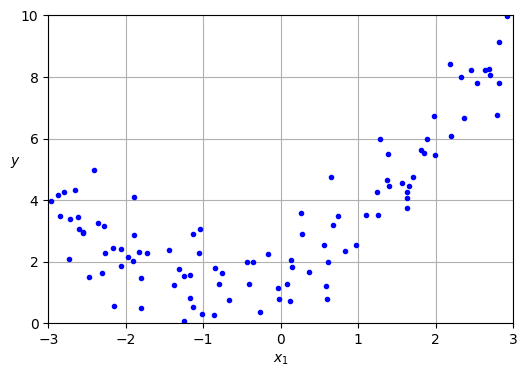

In [227]:
plt.figure(figsize=(6,4))
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

In [228]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [229]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [230]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

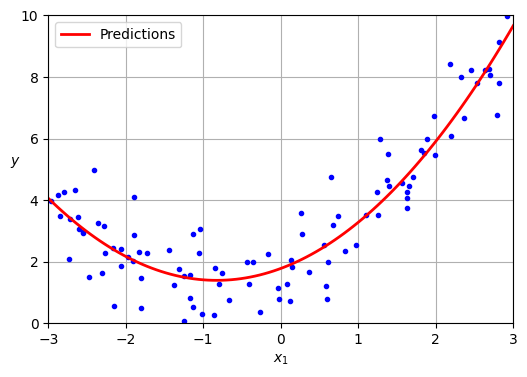

In [231]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly=poly_features.transform(X_new)
y_new= lin_reg.predict(X_new_poly)

plt.figure(figsize=(6,4))
plt.plot(X,y,"b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

The model estimates $\hat y= 0.56x_1^2+0.93x_1+1.78$ when the original function was $y=0.5x_1^2+1.0x_1+2.0+\mathrm{Gaussian\ noise}$

Note: When there are multiple features , polynomial regression is capable of finding relationships between features.

Example: If there are two features a and b, `PolynomialFeatures` with `degree=3` would not only add the features $a^2, a^3, b^2,and \  b^3$ but also the combinations $ab, a^2b,and \ ab^2$.

`PolynomialFeatures(degree=d)`transforms an array containing n features into a array containing $(n+d)!/d!\ n!$ features, where $n!$ is the factorial of $n$, equal to $1 \times 2 \times 3 \times \cdots \times n$

Warning: Combinatorial explosion of the number of features may occur!

## Learning Curve
With high degree polynomial regression, training data will fit much better than with plain linear regression.

High-degree polynomial regression model is severely overfitting the training data, while the linear model is underfitting. The model that will generate best in this case is the quadratic model.

But how to decide how complex the model should be?
How to know if model is underfitting or overfitting?

By using cross-validation to get an estimate of a model's generalization performance. If model performs well with training data but generalizes poorly with the cross-validation metrics, then model is overfitting. If performs poorly for both test and training then it is underFitting.





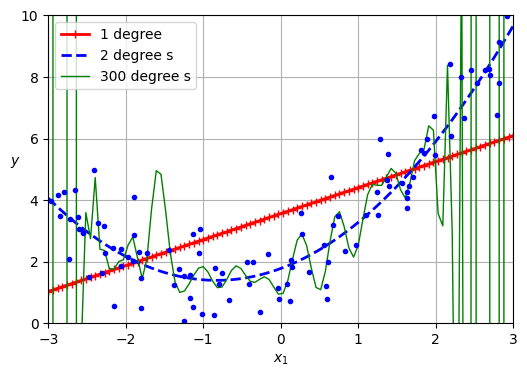

In [232]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6,4))
for style, width, degree in (("r-+", 2,1),("b--",2,2),("g-",1,300)):
  polybig_features=PolynomialFeatures(degree=degree, include_bias=False)
  std_scaler=StandardScaler()
  lin_reg=LinearRegression()
  polynomial_regression=make_pipeline(polybig_features,std_scaler, lin_reg)
  polynomial_regression.fit(X,y)
  y_newbig=polynomial_regression.predict(X_new)
  label=f"{degree} degree {'s' if degree >1 else ''}"
  plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X,y,"b.",linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

in above graph,

degree=300 polynomial model wiggles around to get as close as possible to the training instance.

High-Degree Polynomial : is severely overfitting the training data

Linear-Model: is underfitting

The model that will generalie best in this case is the quadratic model (blue dotted line).



Another way to generlize the model is **Learning curve**, which plots model's training error and validation error as a function of the training iteration: Just evaluate the model at regular intervals during training on both the training set and the validation set, and plot the result.If the model cannot be trained incrementally (if it doesn't support `partial_fit()` or `warm_start`) then need to train the model several times on gradually larger subsets of the training set.

Scikit-Learn has `learning_curve()` function to help with this: it trains and evaluate the model using cross-validation. By default it retrains the model on growing subsets of the training set, but if the model support incremental learning  then can set `exploit_incremental_learning=True` when calling `learning_curve` and it will train the model incrementally instead. The function returns the training set sizes at which it evaluated the model, and the training and validation scores it measured for each size and for each cross-validation fold.

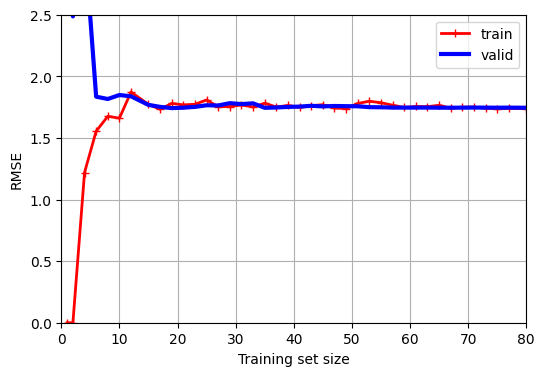

In [233]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores= learning_curve(LinearRegression(),
                                                       X,y, train_sizes=np.linspace(0.01,1.0,40),
                                                       cv=5, scoring="neg_root_mean_squared_error")
train_errors= -train_scores.mean(axis=1)
valid_errors= -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))

plt.plot(train_sizes, train_errors, "r-+", linewidth=2,
         label="train")

plt.plot(train_sizes, valid_errors,"b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0,80,0,2.5])
plt.show()

Above graph shows this in underfitting, in training error when there are 1 or 2 instance then the model fit them perfectly, whih is why the curve starts at 0, But as new instances are added to the training set , it become impossible for the model to fit the training data pefectly.
And it is because of both reason like data is noisy and because it is not linear. so error  on training goes up untill it reaches a plateau(when adding training data doesn't make any change in average error either worse or better).

Now the validation error , when the model is trained on very few training instances, it is incapable of generalizing properly, that is why the validation error is initially quite large, then the model is shown more training examples, it learns and thus the validation error slowly goes down.However , once again a stright line cannot do good job for modeling the data, so the error ends up to a platau, very close to the other curve.

This is the condition of underfitting, if model is underfitting then adding more training data won't help, in this case we need to use a better model.

Now check with learning curve of 10th degree

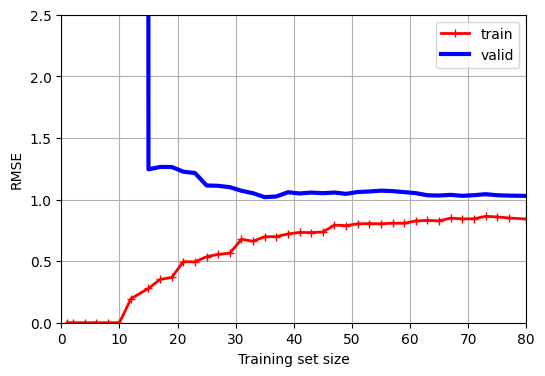

In [234]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

polynomial_regression=make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),LinearRegression()
)

train_sizes, train_scores, valid_scores= learning_curve(polynomial_regression,
                                                       X,y, train_sizes=np.linspace(0.01,1.0,40),
                                                       cv=5, scoring="neg_root_mean_squared_error")
train_errors= -train_scores.mean(axis=1)
valid_errors= -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))

plt.plot(train_sizes, train_errors, "r-+", linewidth=2,
         label="train")

plt.plot(train_sizes, valid_errors,"b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0,80,0,2.5])
plt.show()

Above graph the learning curve look a bit like the previous one, but there are two very important difference.

* the error on the training data is much lower then before.

* There is a gap between the curves. this means that the model performs significantly better on the training data then on the validation data. And this is a overfitting situation.However two curves would continue to get closer if use much larger training set.

## BIAS/ VARIANCE TRADE-OFF

**Bias**: This part of generaliation error is due to wrong assumptions, such as assuming that data is linear . A high bias model is most likely to underfit the training data.

**Variance**: This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degree of freedom(such as high degree polynomial model) is likely to have high variance and thus overfit the training data.

**Irreducible error**: is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (example: fix the data source, suh as broken sensors, or detect and remove outliers).

Increasing a model's compleity will typically increase its variance and reduce its bias. reducing the model complexity will increase the bias and reduce its variance.This is why it is called a trade-off.

## Regularized Linear Models.

How to reduce overfitting?
Regularizing the model can help to reduce overfitting (to constraint it): The fewer degrees of freedom it has, A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For linear model, regularization is typically achieved by constraining the weights of the model.


## Ridge Regression
* it is regularized version of linear regression: a regularization term equal to $\dfrac{\alpha}{m}\sum_{i=1}^n \theta_{i}^2$ is added to MSE.
This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.

Note: Regularization term should only be added to the cost function during training. Once the model is trained , we use unregularized MSE(or RMSE) to evaluate the model's performance.

the hyperparameter $\alpha$ controls how much we want to regularize that model. If $\alpha=0$ then ridge regression is just linear regression. If $\alpha$ is very large, then all weights end up very close to zeroand the result is a flat line going through the data mean

Ridge regression cost function

$J(\theta)=MSE(\theta)+\dfrac{\alpha}{m}\sum_{i=1}^n \theta_i^{2}$

Note: Bias term $\theta_0$ is not regularized (the sum starts at i=1 , not 0). If we define $\mathbf w$ as the vecotr of feature weights (\theta_1 to \theta_n), then the regularization term is equal to $\alpha(||\mathbf w||_2)^2/m$, where $||\mathbf w||_2$ represent the $l2$ norm of the weight vector. **For bath gradient descent , just add $2\alpha \mathbf w/m$ to the part of the MSE gradient vector that corresponds to the feature weights, without adding anything to the gradient of the bias term.**

NOTE: It is important to scale the data (e.g., using a `StandardScalar`) before performing ridge regression, as it is sensitive to the scale of the input features.This is true ofmost regularized models.



Generate a very small and noisy linear dataset:

In [235]:
np.random.seed(42)
m=20
X=3 * np.random.rand(m,1)
print(X.shape)
y= 1+0.5 * X +np.random.randn(m,1) /1.5
X_new=np.linspace(0,3,100).reshape(100,1)
print(X_new.shape)

(20, 1)
(100, 1)


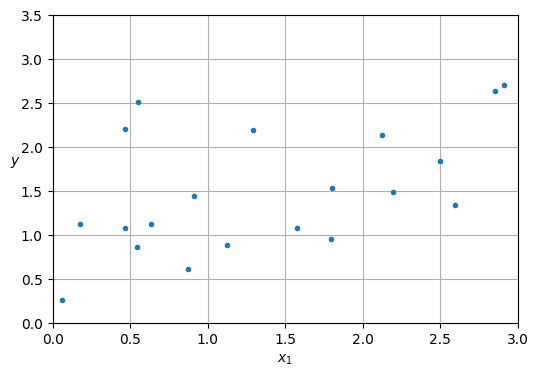

In [236]:
plt.figure(figsize=(6,4))
plt.plot(X,y,".")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,3,0,3.5])
plt.grid()
plt.show()

In [237]:
from sklearn.linear_model import Ridge

ridge_reg= Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

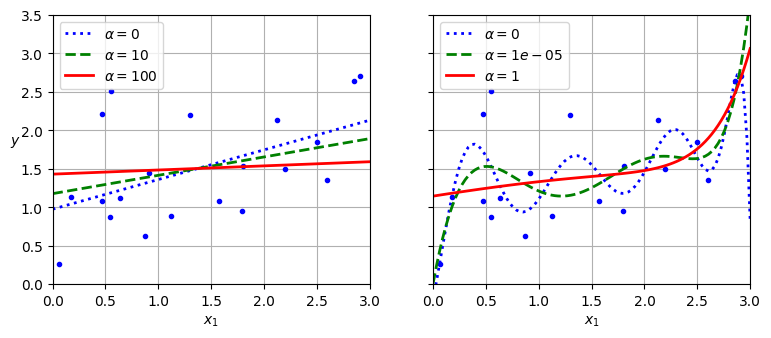

In [238]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
  plt.plot(X,y,"b.", linewidth=3)
  for alpha, style in zip(alphas,("b:","g--","r-")):
    if alpha>0:
      model=model_class(alpha, **model_kwargs)
    else:
        model=LinearRegression()
    if polynomial:
      model=make_pipeline(PolynomialFeatures(degree=10, include_bias=False), StandardScaler(), model)
    model.fit(X,y)
    y_new_regul=model.predict(X_new)
    plt.plot(X_new, y_new_regul, style, linewidth=2, label=fr"$\alpha ={alpha}$")

  plt.legend(loc="upper left")
  plt.xlabel("$x_1$")
  plt.axis([0,3,0,3.5])
  plt.grid()

plt.figure(figsize=(9,3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0,10,100), random_state=42)
plt.ylabel("$y$", rotation=0)
plt.subplot(122)
plot_model(Ridge,polynomial=True, alphas=(0,10**-5,1),random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()


In above diagram, left one is plain ridge models leading to linear predictions. On the right the data is first expanded using `PolynomialFeatures(degree=10)`, then it is scaled using a `StandardScaler`, and finally the ridge models are applied to the resulting features: this is polynomial regression with ridge regularization.

Note increasing $\alpha$ leads to flatter (less extreme , more resonable) predictions, thus reducing the model's variance but increasing its bias.

As with linear regression, we can perform ridge regression either by computing a closed-form equation or by performing gradient descent. The pros and cons are the same.

### Close form solution, where $A$ is the $(n+1) \times (n+1)$ identity matrix, except with a 0 in the top-left cell, correspondinding to the bais term.

$Ridge\ regression\ closed-form\ solution$


$\hat\theta=(\mathbf X^T \mathbf X + \alpha \mathbf A)^{-1}\mathbf X^T \mathrm y$

Here is how to perform ridge regression with scikit-Learn using a closed-form solution (a varient of above equation that uses a matrix factorizationtechnique by **Cholesky**):


In [239]:
# shows the closed form solution of Ridge regression, compare with the next Ridge model's learned parameters below

alpha=0.1
A=np.array([[0.,0.],[0.,1.]])
X_b =np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [240]:
from sklearn.linear_model import Ridge

ridge_reg= Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

In [241]:
ridge_reg.intercept_, ridge_reg.coef_

(array([0.97898394]), array([[0.3828496]]))

Now using Stochastic gradient descent:

In [242]:
sgd_reg= SGDRegressor(penalty="l2", alpha=0.1/m, tol=None, max_iter=1000, eta0=0.01, random_state=42)

sgd_reg.fit(X,y.ravel()) #y.ravel() as fit() expects 1D

sgd_reg.predict([[1.5]])

array([1.55302613])

The `panelty` hyperparameter sets the type of regularization term to use.Specifying `l2` indicates that you want SGD to add a regularization term to the MSE cost function equal to `alpha` times the square of the $l_2$ norm of the weight vector.This is just like ridge regression, except there is no division by $m$ in this case; that's why we pased `alpha=0.1/m`, to get the same result as `Ridge(alpha=0.1)`

In [243]:
# we use Stochastic Average GD (Solver="sag")

ridge_reg=Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55326019]])

The `RidgeCV` class also performs ridge regression, but it automatically tunes hyperparameters using cross-validation. It's roughly equivalant to using `GridSearchCV`, but it optimized for ridge regression and runs much faster. Several other estimators (mostly linear) also have efficient CV variants, such as `LassoCV` and `ElasticNetCV`

## Lasso Regression
Least Absolute Shrinking and Selection Operator regression.

* LASSO is another regularized version on linear regression.
* Just like ridge regression, it adds a regulariation term to the cost function.
* It uses $l_1$ norm of the **weight** vector instead of the square of the $l_2$ norm.
* ${l_1}$ norm multiplied by $2\alpha$, whereas the $l_2$ norm was multiplied by $\dfrac{\alpha}{m}$ in ridge regression.
* These factors were chosen to ensure that the optimal $\alpha$ value is independent from the training set size: different norms lead to different factors.

### **LAASO regression cost function**
$J(\theta)=MSE(\theta) + 2 \alpha \sum_{i=1}^2 \theta_i$



In [244]:
from sklearn.linear_model import Lasso

lasso_reg= Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

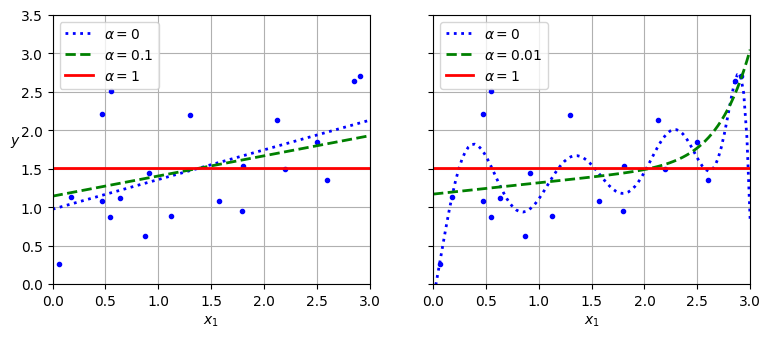

In [245]:
plt.figure(figsize=(9,3.5))

'''
plt.subplot(121)
- creates a subplot with:
- 1 as the number of rows
- 2 as the number of columns
- 1 as the index of the current subplot(starting from 1)
'''
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0,0.1,1), random_state=42)
plt.ylabel("$y$", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0,1e-2,1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

* An important characteristic of lasso regression is that it tends to eliminate the weights of the least important features(i.e., set them to zero). for example, the dased line in the righthand plot in (with $\alpha = 0.01$) looks roughly cubic: all the weights for the high-degree polynomial features are equal to zero. So Lasso regression automatically performs feature selection and output a sparse model with few nonzero feature weights.

In Below graph,
* where the axes represent two model parameters, and the background contours represent different loss functions.
* In the top left plot, the contours represent the $l_1$ loss $(|\theta_1|+|\theta_2|)$, which drops linearly as you get closer to any axis.

For example: if initialize the model parameters to $\theta_1=2 \ and \ \theta_2=0.5 $, running gradient descent will decrement both parameters equally (as represented by the dashed yellow line.) therefore $\theta_2$ will reach 0 first (since it was close to 0 to begin with). After that, gredient descent will roll down the gutter untill it reaches $\theta_1=0$ (with a bit of bouncing around, since the gradients of $l_1$ never get close to 0: they are either -1 or 1 for each parameter).

In the top right plot, the contours represent lasso regression's cost (i.e, an MSE cost function + $l_1$ loss).

The small white circle show the path that gradient descent takes to optimize some model parameters that were initialized around $\theta_1=0.25$ and $\theta_2=-1$: notice once again how the path quickly reaches $\theta_2=0$, then rolls down the gutter and ends up bouncing around the global optimum(represented by the red square). If we increased $alpha$, the global optimum would move left along the dashed yellow line, while if we decreased $\alpha $ the global optimum would move right( in this example, the optimal parameters for the unregularized MSE are $\theta_1=2$ and $\theta_2=0.5$)

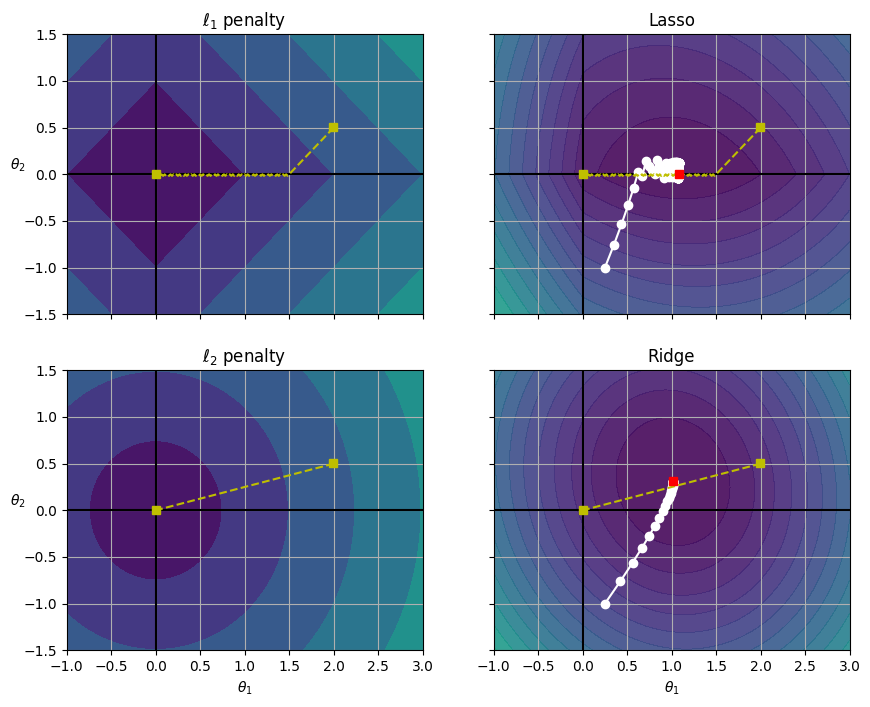

In [246]:
t1a, t1b,t2a, t2b= -1,3,-1.5,1.5

t1s= np.linspace(t1a,t1b, 500)
t2s= np.linspace(t2a, t2b, 500)

t1, t2= np.meshgrid(t1s, t2s)

T = np.c_[t1.ravel(), t2.ravel()]

Xr= np.array([[1,1],[1,-1],[1,0.5]])
yr= 2* Xr[:,:1]+0.5 * Xr[:,1:]

J=(1/len(Xr) * ((T @ Xr.T - yr.T) **2).sum(axis=1)).reshape(t1.shape)

N1= np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2= np.linalg.norm(T,ord=2, axis=1).reshape(t1.shape)

t_min_idx= np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min= t1[t_min_idx], t2[t_min_idx]

t_init= np.array([[0.25],[-1]])

def bgd_path(theta,X,y,l1,l2, core=1,eta=0.05, n_iterations=200):
  path=[theta]
  for iteration in range(n_iterations):
    gradients=(core * 2 /len(X) * X.T @(X @ theta - y)+l1 * np.sign(theta)+l2 * theta)
    theta= theta - eta * gradients
    path.append(theta)
  return np.array(path)

fig, axes= plt.subplots(2,2,sharex=True, sharey=True, figsize=(10.1,8))

for i, N, l1,l2, title in ((0,N1,2.0,0,"Lasso"),(1,N2,0,2.0,"Ridge")):
  JR= J + l1 * N1 + l2 * 0.5 * N2**2

  tr_min_idx=np.unravel_index(JR.argmin(), JR.shape)
  t1r_min, t2r_min= t1[tr_min_idx],t2[tr_min_idx]

  levels=np.exp(np.linspace(0,1,20))-1
  levelsJ= levels * (J.max() - J.min())+J.min()
  levelsJR=levels * (JR.max() - JR.min())+JR.min()
  levelsN= np.linspace(0,N.max(),10)

  path_J= bgd_path(t_init,Xr,yr,l1=0,l2=0)
  path_JR=bgd_path(t_init,Xr,yr,l1,l2)
  path_N= bgd_path(theta=np.array([[2.0],[0.5]]),X=Xr, y=yr, l1=np.sign(l1)/ 3, l2= np.sign(l2), core=0)

  ax= axes[i,0]
  ax.grid()
  ax.axhline(y=0, color="k")
  ax.axvline(x=0, color="k")
  ax.contourf(t1,t2,N/2.0, levels=levelsN)
  ax.plot(path_N[:,0],path_N[:,1],"y--")
  ax.plot(0,0,"ys")
  ax.plot(t1_min, t2_min,"ys")
  ax.set_title(fr"$\ell_{i +1 }$ penalty")
  ax.axis([t1a,t1b,t2a,t2b])
  if i==1:
    ax.set_xlabel(r"$\theta_1$")
  ax.set_ylabel(r"$\theta_2$",rotation=0)

  ax=axes[i,1]
  ax.grid()
  ax.axhline(y=0, color="k")
  ax.axvline(x=0, color="k")
  ax.contourf(t1,t2,JR, levels=levelsJR, alpha=0.9)
  ax.plot(path_JR[:,0], path_JR[:,1],"w-o")
  ax.plot(path_N[:,0],path_N[:,1],"y--")
  ax.plot(0,0,"ys")
  ax.plot(t1_min, t2_min,"ys")
  ax.plot(t1r_min, t2r_min, "rs")
  ax.set_title(title)
  ax.axis([t1a, t1b,t2a,t2b])
  if i==1:
    ax.set_xlabel(r"$\theta_1$")
plt.show()



In above plots, two bottom plots show the same thing but with an $l_2$ penalty instead.

In the bottom-left plot, can see that the $l_2$ loss decreases as we get closer to the origin, so gradient descent just takes a stright path towards that point. In the bottom-right plot, the contours represent ridge regression's cost function(MSE cost function + $l_2$ loss).

The gredients get smaller as the parameters approach the global optimum, so gradient descent natually show down. This limits the bouncing around, which helps ridge onverge faster that lasso regression.

Note that the optimal parameters (represented by the red square) get closer and closer to the origin when increases $\alpha$, but they never get eleminated entirely.

NOTE: To keep gradient descent from bouncing around the optimum at the end when using lasso regression, we nee to gradually reduce the learning rate during training. It will still bounce around the optimum , but the stes will get smaller and smaller, so it will converge.

The Lasso cost function is not differentiable at $\theta_i=0$ (for $i=1,2,...,n$), but gradientdescent still work if we use a subgradient vector instead when any $\theta_i=0$, below equation shows a subgradient vector equation we can use for gradient descent with the lasso cost function.

### Lasso regression subgradient vector

$g(\theta, J)=\nabla_{\theta} MSE(\theta)+ 2 \alpha \begin{pmatrix}
sign(\theta_1)\\
sign(\theta_2)\\
\vdots \\
sign(\theta_n)
 \end{pmatrix} \mathrm{where}\ sign(\theta_i)=\begin{matrix} -1 \ if \ \theta_i <0 \\
 0 \ if \ \theta_i =0 \\
 +1 \ if \ \theta_i >0 \\
  \end{matrix}$

In [247]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])


array([1.53788174])

in place of above we can use `SGDRegressor(penalty="l1", alpha=0.1)`

## Elastic Net Regression

Elastic Net regression is a middle ground between ridge regression and lasso regression. The regularization term is a weighted sum of both ridge and lasso's regularization terms, can control the mix ratio $r$. where $r=0$ , elastic net is equivalent to ridge regression, and when $r=1$, it is equivalent to lasso regression.

### Elastic net cost function
$J(\theta)=MSE(\theta)+ r(2\alpha\sum_{i=1}^n \theta_{i})+(1-r)(\dfrac{\alpha}{m}\sum_{i=1}^n \theta_i^2)$

### When to use which regularization among Ridge, Lasso, Elastic net regression, or plan linear regression?

* We always try to add some regulariation to a model while training a model.

* Avoid plain linear regression

* Ridge is good by default, but when we suspect only few features are important then use Lasso.

* Lasso is good when there are different features correlated as it will reduce the weight accociated to that feature  down to zero for less important features.

* Elastic net regression is preferable over Lasso, because Lasso may behave erratically when the number of features is greater then the number of training instances or when several features are strongly correlated.

In [248]:
from sklearn.linear_model import ElasticNet

elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stopping

Stop the training as soon as (RMSE) on training set goes down along with its prediction error on the validation set.

After a while validation error stops decreasing and strats to go back up. This indicates that the model has started to overfit the training data.

With early stopping we can just stop traing as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique.


In below code it is not stopping early , but it is helping to get the best_model where the error is minimum, and it is not using any regularization.


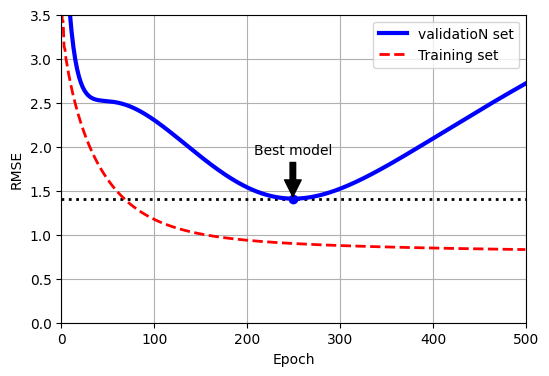

In [249]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m= 100
X= 6 * np.random.rand(m,1) -3
y= 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)

X_train, y_train=X[:m //2], y[:m//2,0]
X_valid, y_valid=X[m//2 :], y[m // 2 :, 0]
preprocessing=make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())

X_train_prep= preprocessing.fit_transform(X_train)
X_valid_prep=preprocessing.transform(X_valid)

sgd_reg=SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs=500
best_valid_rmse=float('inf') # let's define initial RMSE as  infinity
train_errors, val_errors=[],[]

for epoch in range(n_epochs):
  sgd_reg.partial_fit(X_train_prep, y_train) # to perform incremental learning.
  y_valid_predict= sgd_reg.predict(X_valid_prep)
  val_error=mean_squared_error(y_valid, y_valid_predict, squared=False) #squared is for root_mean_square_error
  if val_error < best_valid_rmse:
    best_valid_rmse=val_error
    best_model=deepcopy(sgd_reg) # because it copies the model's hyperparameters and the learned parameters...
    #In contrast, sklearn.base.clone() only copies the model's hyperparameters.

  y_train_predict=sgd_reg.predict(X_train_prep)
  train_error= mean_squared_error(y_train, y_train_predict, squared=False )
  val_errors.append(val_error)
  train_errors.append(train_error)

best_epoch= np.argmin(val_errors)
plt.figure(figsize=(6,4))
plt.annotate("Best model", xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse+0.5), ha="center", arrowprops=dict(facecolor="black", shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse],"k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="validatioN set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0,n_epochs, 0, 3.5])
plt.grid()
plt.show()

## Logistic Regression

Based on given threshold (typically 50%) model can be predicted.

* It is also used as binary classifier.

### Estimating Probabilities

Logistic regression computes a weighted sum of the input features (plus a bias term),but instead of outputting the result directly like the linear regression model does, it outputs the logistic of the result.

### Logistic regression model estimated probability(vectorized form)

$\hat p=h_{\theta}(\mathbf{x})=\sigma (\theta^{\mathrm T}{\mathbf x})$

The logistic noted $\sigma(\cdot)$ is a sigmoid function (S-shaped) that outputs a number between 0 and 1. It is defined as

##Logistic function#

$\sigma (t)= \dfrac{1}{1+exp(-t)}$

Once the logistic regression model has estimated the probability $\hat p = h_{\theta}(\mathbf x)$ that an instane $\mathbf x$ belongs to the positive class, it can make its prediction $\hat y$ easily.

$\hat y= \begin{matrix}
0 & if\ \hat p < 0.5 \\
1 & if\ \hat p >= 0.5 \\
 \end{matrix}$

 so if $\theta_T \mathbf x$ is positive then probability predicts 1 else 0.

 $t$ is also called a logit. and it is defined as $logit(p)= log \dfrac{p}{(1-p)}$ is the inverse of logistic function. computing logit of the estimated probability $p$ will generate result $t$

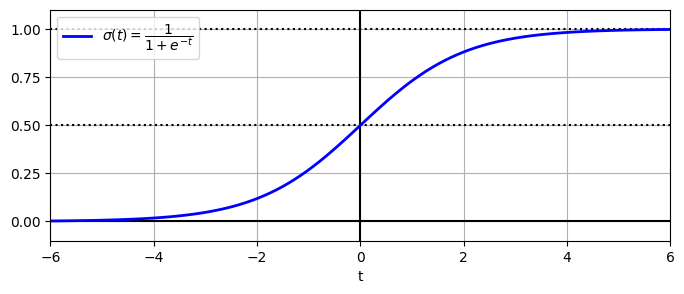

In [250]:
lim= 6

t = np.linspace(-lim, lim, 100)

sig = 1/(1+np.exp(-t))
plt.figure(figsize=(8,3))
plt.plot([-lim, lim],[0,0],"k-")
plt.plot([-lim,lim],[0.5,0.5],"k:")
plt.plot([-lim, lim], [1,1], "k:")
plt.plot([0,0],[-1.1,1.1],"k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1+e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim,lim, -0.1,1.1])
plt.gca().set_yticks([0,0.25,0.5,0.75,1])
plt.grid()
plt.show()

## Training and cost function

The objective is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instances (y=1) and low probabilities for negative instances (y=0), this is captured by the cost function

In case for a single training instance $\mathrm x$.

### Cost function of a single training instance

$c(\theta)= \begin{matrix}
-log(\hat p) & if \ y=1 \\
-log(1-\hat p) & if \ y=0
 \end{matrix}$

when t approaches 0, -log(t) grows very large, so the cost will be large if the model estimate the probability near to 0, as $-log(t)= log(t)^{-1} = \dfrac{1}{log(t)}$.

it will also be large if the model estimates a probability close to 1.

$-log(1- \hat p)= log(1 - \hat p)^{-1}= \dfrac{1}{(1- \hat p)}$

cost function over the whole training set is the average cost over all training instance. It can be written in single expression called the log loss.

$J(\theta)= - \dfrac{1}{m}\sum_{i=1}^m \ y^{(i)}\ log(\hat p^{(i)} ) + (1 - y^{(i)} log(1- \hat p^{(i)}))$

Minimizing the loss function will result in the model with the maximum liklihood of being optimal. When using log loss , it is important that instances (dataset) follows **Gaussian distribution** around the mean of their classes.

The cost function log loss is convex, so gredient descent (or any other optimization algorithm) is guaranteed to find the global minimum (learning should not be too large annd it will take time to converge).The partial derivatives of the cost function with regard to the $\mathbf j^{th}$ model parameter $\theta_j$ can be written as:

$\dfrac{\partial}{\partial\theta_j}J(\theta)=\dfrac{1}{m}\sum_{1=1}^m \sigma ((\theta^T \mathbf x^{(i)})- y^{(i)}) x_j^{(i)}$

so for each instance it predicts the error and multiplies it by the $j^{th}$ feature value, and then it computes the average over all training instancecs. Once gradeient vector calculated containing all partial derivatives, can use it in the batch gradient descent algorithm.then we can simply train the logistic regression model. For stochastic GD we need to take one instance at a time. and for mini-batch GD we can use a mini batch at a time.

## Decision Boundries



In [251]:
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)
list(iris)


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [252]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [253]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [254]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [255]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#using single feature.
X=iris.data[["petal width (cm)"]].values
y=iris.target_names[iris.target]=='virginica'

X_train,X_test, y_train, y_test=train_test_split(X,y,random_state=42)

log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

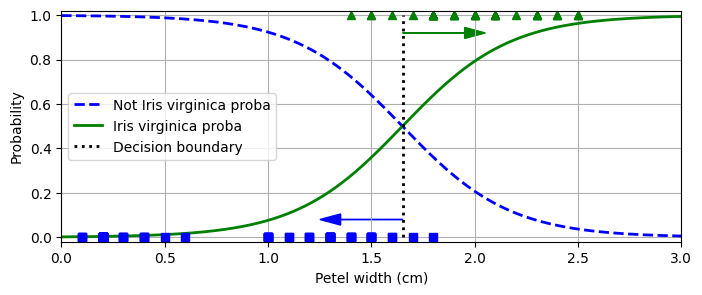

In [257]:
X_new= np.linspace(0,3,1000).reshape(-1,1) # reshape to get a column vector

y_proba= log_reg.predict_proba(X_new)

'''
X_new[y_proba[:,1]>=0.5] will create a m X 1 matrix with ascending order so [0,0] will take the first value which is smallest and near to
+ve threshold 0.5
'''
decision_boundary=X_new[y_proba[:,1]>=0.5][0,0] #decision_boundary=1.6516516516516517

plt.figure(figsize=(8,3))

plt.plot(X_new, y_proba[:,0],"b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:,1],"g-",linewidth=2,label="Iris virginica proba")

plt.plot([decision_boundary, decision_boundary],[0,1],"k:", linewidth=2, label="Decision boundary")

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,  head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,  head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train==0], y_train[y_train==0],"bs")
plt.plot(X_train[y_train==1], y_train[y_train==1],"g^")
plt.xlabel("Petel width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0,3,-0.02, 1.02])
plt.grid()
plt.show()


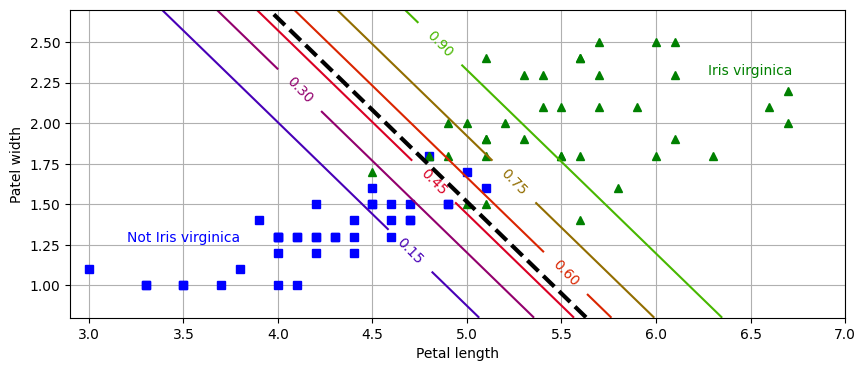

In [258]:
X=iris.data[["petal length (cm)", "petal width (cm)"]].values
y=iris.target_names[iris.target]=='virginica'

X_train, X_test, y_train,y_test=train_test_split(X,y,random_state=42)

log_reg=LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

x0, x1= np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1,1), np.linspace(0.8, 2.7, 200).reshape(-1,1))

X_new=np.c_[x0.ravel(), x1.ravel()] #one instance per point on the figure.

y_proba = log_reg.predict_proba(X_new)
zz= y_proba[:,1].reshape(x0.shape)

# for the decision boundry

left_right=np.array([2.9,7])
boundary= -((log_reg.coef_[0,0] * left_right + log_reg.intercept_[0]) /log_reg.coef_[0,1])

plt.figure(figsize=(10,4))
plt.plot(X_train[y_train==0,0], X_train[y_train==0 ,1], "bs")
plt.plot(X_train[y_train==1,0], X_train[y_train==1,1],"g^")
contour= plt.contour(x0,x1,zz,cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary,"k--", linewidth=3)
plt.text(3.5,1.27,"Not Iris virginica", color="b", ha="center")
plt.text(6.5,2.3,"Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Patel width")
plt.axis([2.9,7,0.8,2.7])
plt.grid()
plt.show()

Just like other linear models , logistic regression model can be regularized using $l_1$ or $l_2$ penalties.**Scikit-Learn actually adds an $l_2$ penalty by default**

## Softmax Regression

Logistic regression model can be generalized for multiple classes directly, without having to train and combine multiple binary classifiers. This is called softmax regression, or multinomial logistic regression.

When giving an instance $\mathbf x$, the softmax regression model first computes a score $s_k(\mathbf x)$ for each class k, then estimate the probability of each class by applying the softmax function(also called the normalized exponential) to score.

### Softmax score for class k

$s_k(\mathbf x)=(\theta^{(k)})^T \mathbf x$

each class has its own dediated parameter vector $\theta^{(k)}$. All these vectors are typically stored as rows in a parameter matrix 𝚯.

once computed the score for every class for the instance $\mathbf x$, can estimate the probability $\hat p_k$ that the instane belongs to class k by running the score through the softmax function. The function computes the exponential of every score, the normalizes them (dividing by the sum of all the exponentials). the scores are generally called Logits or log-odds.

### Softmax function

$\hat p= σs(\mathbf x)_k= \dfrac{exp \ s_k(\mathbf x)}{\sum_{j=1}^k exp \ s_j(\mathbf x)}$

In above equation:
* k is the number of classes.

* $s(\mathbf x)$ is a vector containing the scores of each class for the instance $\mathbf x$.

* $\sigma (\mathbf s(\mathbf x))_k $is the estimated probability that the instance $\mathbf x$ belongs to class k, given the scores of each class for that instance.

### Softmax regression classifier prediction

$\hat y= \underset k {argmax} \ \sigma s((\mathbf x))_k= \underset k{argmax}\ s_k(\mathbf x)= \underset k{argmax}(\theta^{(k)})^T \mathbf x$

The argmax operator returns the value of a variable that maximize a function. In this equation, it returns the value of k that maximizes the estimated probability $\sigma (\mathbf s(\mathbf x))_k$

Softmax regression classifier predicts only one class at a time (it is multiclass not a multioutput). So it should be used only with mutually exclusive classes. cannot use to recognize multiple types of fruits in one basket.

Now the objective is to have a model that estimates a high probability for the target class(along with low probability for the other classes.)

Minimizing the cost function called the **cross entropy** , it lead to this objective because it penalizes the model when it estimates a low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities mathces the target classes.

### Cross entropy cost function

$J(𝛩)= - \dfrac{1}{m}\sum_{i=1}^m \sum_{k=1}^k y_k^{(i)}log(\hat p_k^{(i)})$

In this equation $y_k^{(i)}$ is the target probability that the $i^{th}$ instance belongs to class $k$. In general it is either equal to 1 or 0, depends on whether the instance belongs to the class or not.

NOTE: When there are only 2 classes (k=2) , this cost function is equivalent to the logistic regression cost function.

The cross entrophy between two probability distributions $p$ and $q$ is defined as :      
$H(p,q)=-\sum_x P(x) log\ q(x)$

The Gradient vector of this cost function with regard to $\theta ^{(k)}$

### Cross entropy gradient vector for class k

$\nabla_{\theta^{(k)}}=\dfrac{1}{m} \sum_{i=1}^m \hat p_k^{(i)}- y_k^{(i)})\mathbf x^{(i)}$

Now can compute gradient vector for every class, then use gradient descent (or any optimization algorithm) to find the parameter matrix 𝜣 that minimizes the cost function.



In [259]:
X= iris.data[["petal length (cm)","petal width (cm)"]].values
y=iris["target"]

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42)

softmax_reg= LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [260]:
softmax_reg.predict([[5,2]])

array([2])

In [261]:
softmax_reg.predict_proba([[5,2]]).round(2)

array([[0.  , 0.04, 0.96]])

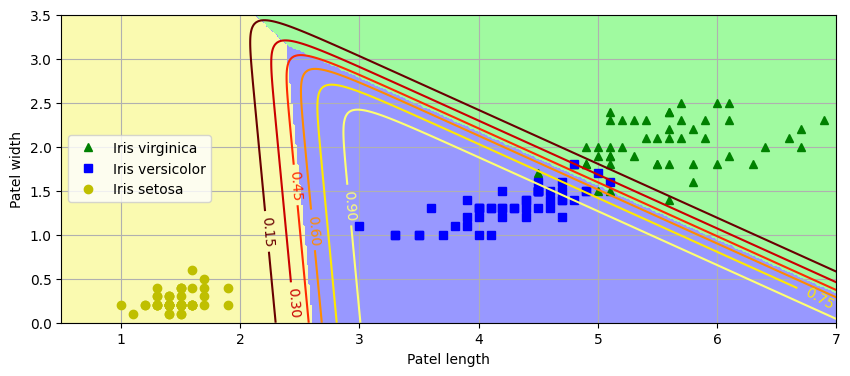

In [262]:
from matplotlib.colors import ListedColormap

custom_cmap= ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1= np.meshgrid(np.linspace(0,8,500).reshape(-1,1), np.linspace(0,3.5,200).reshape(-1,1))

X_new=np.c_[x0.ravel(), x1.ravel()]

y_proba=softmax_reg.predict_proba(X_new)
y_predict= softmax_reg.predict(X_new)

zz1= y_proba[:,1].reshape(x0.shape)
zz=y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==2,0], X[y==2,1],"g^", label="Iris virginica")
plt.plot(X[y==1,0], X[y==1,1],"bs", label="Iris versicolor")
plt.plot(X[y==0,0], X[y==0,1],"yo", label="Iris setosa")

plt.contourf(x0,x1,zz, cmap=custom_cmap)
contour= plt.contour(x0,x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Patel length")
plt.ylabel("Patel width")
plt.legend(loc="center left")
plt.axis([0.5,7,0,3.5])
plt.grid()
plt.show()

## Excercise Solution

Which linear regression training algorithm can you use if you have a training set with millions of features?

- In case million of features we can use either Stochastic Gradient Descent or Mini-batch Gradient Descent, and also Batch Gradient Descent if the training set fits in memory. But cannot use the Normal Equation or the SVD approach because the computational complexity grows quickly(more than quadratically) with the number of features.

Suppose the features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?

- It will impact the cost function and cost function will have the shape of an elongated bowl, so the Gradient Descent algorithms will take a long time to converge.Normal equation or SVD approach will work just fine without scaling. If no scaling is applied, regularized models may converge to a suboptimal solution if the features are not scaled: Sine regularization penalizes large weights , features with smaller values will tend to be ignored compared to features with larger values.

Suppose the features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?

- Gradient Descent cannot get stuck in a local minimum when training a Logistic Regression model because the cost function is convex. Convex mean when we draw a stright line between two points on the curve, the line never crosses the curve.

Do all gradient descent algorithms lead to the same model, provided you let them run long enough?

- If the optimization problem is convex (such as Linear Regression or Logistic Regression), and assuming the learning rate is not too highm then all Gradient Descent algorithms will approach the global optimum and end up producing fairly similar models. However, unless we  gradually reduce the learning rate, Stochastic Gradient Descent and Mini-Batch GD will never truly converge; instead they will keep jumping back and forth around the global optimum.This mean even training for long time without changing learning rate this GD algorithm will produce slightly different models.

Suppose you use batch gradient descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

- If the validation error consistently goes up after every epoch, then one possibility is that the learning rate is too high and the algorithm is diverging. If the training error also goes up , then this is clearly the problem and need to reduce the learning rate, check for other things as well like training data size, or feature scaling etc. if training error is not going up then model is overfitting the training set and immediate stopping a training is good option.



Is it a good idea to stop mini-batch gradient descent immediately when the validation error goes up?

- Due to the random nature , neither Stochastic GD nor mini-batch GD is going to make progress at every single training iteration. SO immediatly stopping training when the validation error goes up , we may stopping it too early, before the optimum is reached. A better option is to save the model at a regular intervals, then when it has not improved for a long time (meaning it will not beat the last calculated optimal value), then we can use the current-1 best saved model.

Which gradient descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

- Stocastic Gradient Descent has a fastest training iteration since it considers only one training instance at a time m so it is generally the first to reach the vicinity of global optimum (or Mini-Batch GD with a very small mini-batch size). However only Batch Gradient Descent will actually converge, given enough training time. Stochastic GD and Mini-Batch GD wil bounce around the optimum, unless gradually reducing learning rate.

Suppose you are using polynomial regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

- If validation error is much higher than the training error then model is overfitting the training set, one way to fix this to reduce the polynomial degree, another way is to regularize the model - for example , by adding an $l_2$ penalty (Ridge) or $l_1$ (Lasso) to cost function, this will also reduce the degree of freedom of the model. We an also increase the size of training set .

Suppose you are using ridge regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

- when trining error and validation error are almost equal and fairly high it means model is likely undeitting the training set, which means it has a high bias.we can reduce the regulariation hyperparameter $alpha$.

Why would you want to use:

Ridge regression instead of plain linear regression (i.e., without any regularization)?

- Amodel with some regularization typically performs better than a model without any regularization, and prefered one is Ridge Regression over plain Linear Regression.

Lasso instead of ridge regression?

- Lasso Regression uses an $l_1$ penalty, which tends to push the weights down to exactly zero. This leads to sparse models, where all weights are zero except for the most important weights. This is the way to perform feature selection automatically, this is good if we suspect only a few features actually matter. When not sure with features then we should prefer Ridge Regression.

Elastic net instead of lasso regression?

- Elastic net is generally preferred over Lasso since Lasso may behave erratically in some cases  ( when several features are strongly correlated or when there are more features then training instance). However it does add an extra hyperparameter to tune. If want to use Lasso without the erratic behaviour then we can just use Elastic Net with an `l1_ratio` close to 1.

Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two logistic regression classifiers or one softmax regression classifier?

-there are 4 combinations are possible , and all 4 are not exclusive classes, using Logistic Regression is better option.

Implement batch gradient descent with early stopping for softmax regression without using Scikit-Learn, only NumPy. Use it on a classification task such as the iris dataset.

## Batch Gradient Descent with early stopping for Softmax Regression.



Load the data, using same iris dataset.

In [263]:
X= iris.data[["petal length (cm)", "petal width (cm)"]].values
y=iris["target"].values

We need to add the bias term for every instance $(x_0=1)$. We can also use Scikit-learn's `add_dummy_feature()` function. In this example will use simple numpy

In [264]:
X_with_bias= np.c_[np.ones(len(X)), X]

The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn's `train_test_split()` , however here we will do it manually.

In [265]:
test_ratio=0.2
validation_ratio= 0.2

total_size=len(X_with_bias)
print("total size \n",total_size)
print("===============================")
test_size=int(total_size* test_ratio)
validation_size=int(total_size * validation_ratio)
train_size= total_size - test_size - validation_size

np.random.seed(42) # because of this permutation will always return same index positions
rnd_indices=np.random.permutation(total_size)
print("rnd_indices \n",rnd_indices)
print("===============================")
X_train =  X_with_bias[rnd_indices[:train_size]]
print("rnd_indices[:train_size] \n",rnd_indices[:train_size])
print("===============================")
y_train =  y[rnd_indices[:train_size]]
X_valid =  X_with_bias[rnd_indices[train_size:-test_size]]
print("rnd_indices[train_size:-test_size] \n",rnd_indices[train_size:-test_size])
print("===============================")
y_valid =  y[rnd_indices[train_size:-test_size]]
X_test  =  X_with_bias[rnd_indices[-test_size:]]
print("rnd_indices[-test_size:] \n",rnd_indices[-test_size:])
print("===============================")
y_test =  y[rnd_indices[-test_size:]]


total size 
 150
rnd_indices 
 [ 73  18 118  78  76  31  64 141  68  82 110  12  36   9  19  56 104  69
  55 132  29 127  26 128 131 145 108 143  45  30  22  15  65  11  42 146
  51  27   4  32 142  85  86  16  10  81 133 137  75 109  96 105  66   0
 122  67  28  40  44  60 123  24  25  23  94  39  95 117  47  97 113  33
 138 101  62  84 148  53   5  93 111  49  35  80  77  34 114   7  43  70
  98 120  83 134 135  89   8  13 119 125   3  17  38  72 136   6 112 100
   2  63  54 126  50 115  46 139  61 147  79  59  91  41  58  90  48  88
 107 124  21  57 144 129  37 140   1  52 130 103  99 116  87  74 121 149
  20  71 106  14  92 102]
rnd_indices[:train_size] 
 [ 73  18 118  78  76  31  64 141  68  82 110  12  36   9  19  56 104  69
  55 132  29 127  26 128 131 145 108 143  45  30  22  15  65  11  42 146
  51  27   4  32 142  85  86  16  10  81 133 137  75 109  96 105  66   0
 122  67  28  40  44  60 123  24  25  23  94  39  95 117  47  97 113  33
 138 101  62  84 148  53   5  93 111  49

Target has currently 3 classes indices (0,1,2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all class except for the target class whih will have a probability of 1.0 (the vector of a class probabilities for any given instanec is a one-hot vector).
In below function it is converting the vector of class indices into a matrix containing a one-hot vector for each instance.

In [266]:
np.diag(np.ones(y.max()+1))

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [267]:
def to_one_hot(y):
  '''
  y.max()+1 will return ma value of y and add 1 as array starts from 0 , in this case it is 3
  np.ones(3) will create 1 X 3 = [1 1 1]
  np.diag(np.ones(3)) will create 3 X 3 identity matrix
  np.diag(np.ones(y.max()+1))[y] : this will change y values in number of independent values , in this case it will be 3 as there are 3 unique values, so represent 1st value it will be 1 , 0, 0 then 2nd one will be 0, 1, 0 then again for 2nd value 0, 1, 0
  '''
  return np.diag(np.ones(y.max() + 1))[y]


test for first 10 instances of y (target values)

In [268]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [269]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

Creating target class probabilities matrix for the training set and the test set.

In [270]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

scaling input features, as these are numerical type features , we compute mean and standard deviation of each feature on the training set (except for the bias feature), then we center and scale each feature in the training set, the validation set, and the test set:

In [271]:
mean= X_train[:,1:].mean(axis=0)
std= X_train[:,1:].std(axis=0)
X_train[:,1:]=(X_train[:,1:] - mean) /std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:,1:]= (X_test[:,1:] - mean) /std

Now implement the softmax function.

$\sigma (s(\mathbf x))_k= \dfrac{\mathbf exp(s_k(\mathbf x))}{\sum_{j=1}^k exp(s_j(\mathbf x))}$

In [272]:
def softmax(logits):
  exps=np.exp(logits)

  exp_sums= exps.sum(axis=1, keepdims=True)

  return exps/ exp_sums

define the number of inputs and outputs

In [273]:
n_inputs= X_train.shape[1] #==3 (2 features plus the bias term)
n_outputs= len(np.unique(y_train))

In [274]:
n_inputs

3

In [275]:
n_outputs

3

Equation we need are the cost function:

$J( \mathbf {𝚯})= \dfrac{1}{m}\sum\limits_{i=1}^m \sum\limits_{k=1}^k {y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\theta^{(k)}} J(𝚯)= \dfrac{1}{m}\sum\limits_{i=1}^{m} \left(\hat p_{k}^{(i)}-y_{k}^{(i)}\right) \mathbf x^{(i)} $

Note: $\log \left(\hat p_{k}^{(i)}\right)$ may not be computable if  $ \left(\hat p_{k}^{(i)}\right)=0$ so we add a tiny value $\epsilon$ to  $\log\left(\hat p_{k}^{(i)}\right)$ to avoid getting `nan` values

In [276]:
np.random.randn(n_inputs, n_outputs)

array([[-0.53441645, -1.49505387, -0.78925833],
       [ 0.74371128, -0.21216142, -0.42686879],
       [ 0.50144833,  1.15818665,  0.25711687]])

In [277]:
eta=0.5
n_epochs=5001
m=len(X_train)
epsilon = 1e-5 # 10^(-5)

np.random.seed(42)
Theta= np.random.randn(n_inputs, n_outputs) # this will create 3 X 3 random numbers between 3,3

for epoch in range(n_epochs):
  logits = X_train @ Theta
  Y_proba= softmax(logits)
  if epoch % 1000 == 0:
    Y_proba_valid= softmax(X_valid @ Theta)

    xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))

    print(epoch, xentropy_losses.sum(axis=1).mean())

  error= Y_proba - Y_train_one_hot
  gradients= 1 / m * X_train.T @ error
  Theta= Theta - eta * gradients


0 3.7085808486476917
1000 0.14519367480830644
2000 0.1301309575504088
3000 0.12009639326384539
4000 0.11372961364786884
5000 0.11002459532472425


The softmax model is trained. now checking model parameters

In [278]:
Theta

array([[ 0.41931626,  6.11112089, -5.52429876],
       [-6.53054533, -0.74608616,  8.33137102],
       [-5.28115784,  0.25152675,  6.90680425]])

predict for the validation set and check the accuracy score

In [279]:
logits= X_valid @ Theta
Y_proba=softmax(logits)
y_predict=Y_proba.argmax(axis=1)

accuracy_score=(y_predict==y_valid).mean()
accuracy_score

0.9333333333333333

now adding a regularization $l_2$, we don't regularize the first element of `Theta` as that is bias term. also increasing learning rate `eta`

In [280]:
eta = 0.5
n_epochs=5001
m=len(X_train)
epsilon= 1e-5
alpha=0.01 #regularization hyperparameter

np.random.seed(42)
Theta=np.random.randn(n_inputs, n_outputs)

for epoch in range (n_epochs):
  logits= X_train @ Theta
  Y_proba= softmax(logits)
  if epoch % 1000 ==0:
    Y_proba_valid= softmax(X_valid @ Theta)
    xentropy_losses= -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
    l2_loss=1/2 *(Theta[1:]**2).sum()
    total_loss=xentropy_losses.sum(axis=1).mean() + alpha * l2_loss
    print(epoch, total_loss.round(4))

  error= Y_proba - Y_train_one_hot
  gradients= 1/m * X_train.T @ error
  gradients +=np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
  Theta = Theta - eta * gradients

0 3.7372
1000 0.3259
2000 0.3259
3000 0.3259
4000 0.3259
5000 0.3259


Because of $l_2$ panelty , the loss seems greater than earlier.

In [281]:
logits=X_valid @ Theta
Y_proba=softmax(logits)
y_predict=Y_proba.argmax(axis=1)

accuracy_score=(y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

so regularization with $l_2$ doesn't make any difference so changing `alpha` value might help.

Now adding early stoping . For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [282]:
eta=0.5
n_epochs=5_001
m=len(X_train)
epsilon=1e-5
C=100 #regulariation hyperparametr
best_loss=np.infty # setting highest loss as initial value

np.random.seed(14)
Theta= np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
  logits= X_train @ Theta
  Y_proba = softmax(logits)
  Y_proba_valid= softmax(X_valid @ Theta)
  xentropy_losses=-(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
  l2_loss= 1/2 * (Theta[1:]**2).sum()
  total_loss=xentropy_losses.sum(axis=1).mean() + 1 /C * l2_loss

  if epoch % 1000 ==0:
    print(epoch, total_loss.round(4))
  if total_loss < best_loss:
    best_loss=total_loss

  else:
    print(epoch -1, best_loss.round(4))
    print(epoch, total_loss.round(4), "early stopping!")
    break
  error=Y_proba - Y_train_one_hot
  gradients= 1/m * X_train.T @ error
  gradients +=np.r_[np.zeros([1, n_outputs]), 1/ C * Theta[1:]]
  Theta=Theta - eta * gradients


0 1.166
216 0.3234
217 0.3234 early stopping!


In [283]:
logits= X_valid @ Theta
Y_proba= softmax(logits)
y_predict= Y_proba.argmax(axis=1)
accuracy_score= (y_predict== y_valid).mean()
accuracy_score

0.9333333333333333

There is no change in validation set , still able to reduce the training time by using early stopping

Now plotting the model's prediction on the whole dataset

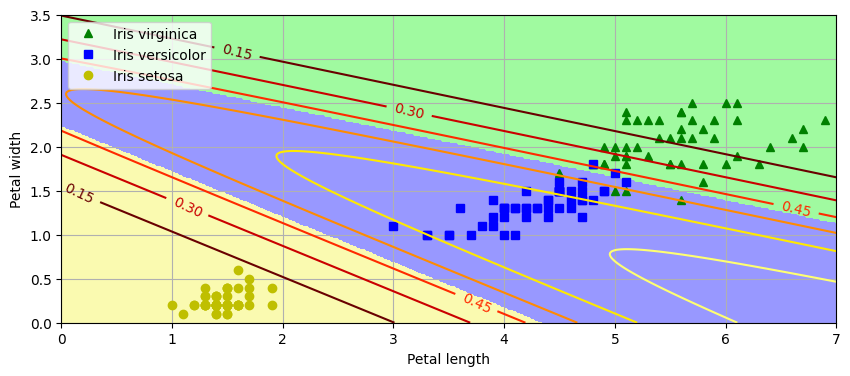

In [284]:
custom_cmap=mpl.colors.ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1= np.meshgrid(np.linspace(0,8, 500).reshape(-1,1), np.linspace(0,3.5,200).reshape(-1,1))

X_new=np.c_[x0.ravel(), x1.ravel()]
X_new=(X_new - mean)/ std  #scaled value
X_new_with_bias= np.c_[np.ones(len(X_new)), X_new]

logits= X_new_with_bias @ Theta
Y_proba= softmax(logits)
y_predict=Y_proba.argmax(axis=1)

zz1= Y_proba[:,1].reshape(x0.shape)
zz= y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==2,0], X[y==2,1], "g^", label="Iris virginica")
plt.plot(X[y==1,0], X[y==1,1], "bs", label="Iris versicolor")
plt.plot(X[y==0,0], X[y==0,1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour= plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7, 0,3.5])
plt.grid()
plt.show()


Now let's measure the final model's accuracy on the test set

In [285]:
logits= X_test @ Theta
Y_proba= softmax(logits)
y_predict= Y_proba.argmax(axis=1)

accuracy_score= (y_predict== y_test).mean()
accuracy_score

0.9666666666666667

test accuracy is good as compare with training and validation set, however this can be improve further using diffrent random seed or adding more data in training dataset.